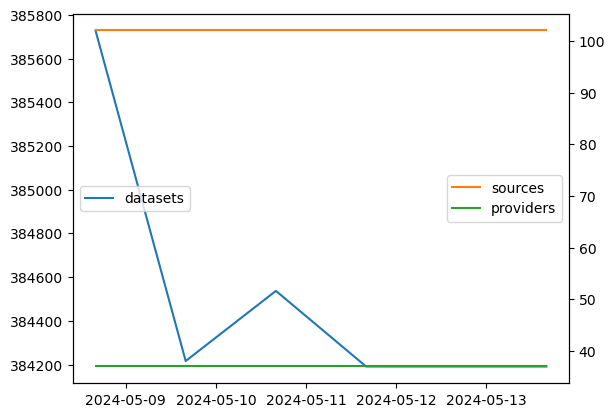

In [1]:
import json
import urllib.request
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np

with urllib.request.urlopen("https://md.umwelt.info/counts/all") as response:
    data = json.load(response)

    timestamps = np.fromiter(
        (datetime.fromisoformat(item["timestamp"]) for item in data), dtype=object
    )
    datasets = np.fromiter((item["datasets"] for item in data), dtype=np.uint)
    sources = np.fromiter((item["sources"] for item in data), dtype=np.uint)
    providers = np.fromiter((item["providers"] for item in data), dtype=np.uint)


fig, ax1 = plt.subplots()

ax1.xaxis.set(
    major_locator=dates.DayLocator(), major_formatter=dates.DateFormatter("%Y-%m-%d")
)

ax1.plot(timestamps, datasets, label="datasets")

ax2 = ax1.twinx()
ax2._get_lines = ax1._get_lines

ax2.plot(timestamps, sources, label="sources")
ax2.plot(timestamps, providers, label="providers")

ax1.legend(loc="center left")
ax2.legend(loc="center right")

plt.show()